In [34]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [35]:
#load data
data = pd.read_csv("..\..\..\Data\Day\S&P 500 Historical Data00-20.csv")

In [36]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [37]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [38]:
special_data = pd.DataFrame(data)

In [39]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2014-01-01')]
special_data.index = data.index[:len(special_data)]

In [40]:
#change indexes
special_data.set_index('Date', inplace = True)

In [41]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [42]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010
2010-01-11,1146.98,1145.96,1149.74,1142.02,0.17%,01/11/2010
2010-01-12,1136.22,1143.81,1143.81,1131.77,-0.94%,01/12/2010
2010-01-13,1145.68,1137.31,1148.40,1133.18,0.83%,01/13/2010
2010-01-14,1148.46,1145.68,1150.41,1143.80,0.24%,01/14/2010


In [43]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1132.99,1132.99
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1136.52,1136.52
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1137.14,1137.14
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1141.69,1141.69
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1144.98,1144.98


In [44]:
import datetime

special_data.loc[special_data.index[0], 'new_index'] = 1262563200
special_data.loc[special_data.index[0], 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[special_data.index[0], 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(1, len(special_data.new_index)):
        special_data.loc[special_data.index[i], 'new_index'] = special_data.new_index[special_data.index[i-1]] + 86400
        special_data.loc[special_data.index[i], 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[special_data.index[i], 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2010-01-04 07:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [45]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [46]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1.262563e+09
2010-01-05 07:00:00,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1.262650e+09
2010-01-06 07:00:00,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1.262736e+09
2010-01-07 07:00:00,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1.262822e+09
2010-01-08 07:00:00,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1.262909e+09
2010-01-09 07:00:00,1146.98,1145.96,1149.74,1142.02,0.17%,01/11/2010,1.262995e+09
2010-01-10 07:00:00,1136.22,1143.81,1143.81,1131.77,-0.94%,01/12/2010,1.263082e+09
2010-01-11 07:00:00,1145.68,1137.31,1148.40,1133.18,0.83%,01/13/2010,1.263168e+09
2010-01-12 07:00:00,1148.46,1145.68,1150.41,1143.80,0.24%,01/14/2010,1.263254e+09


In [47]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

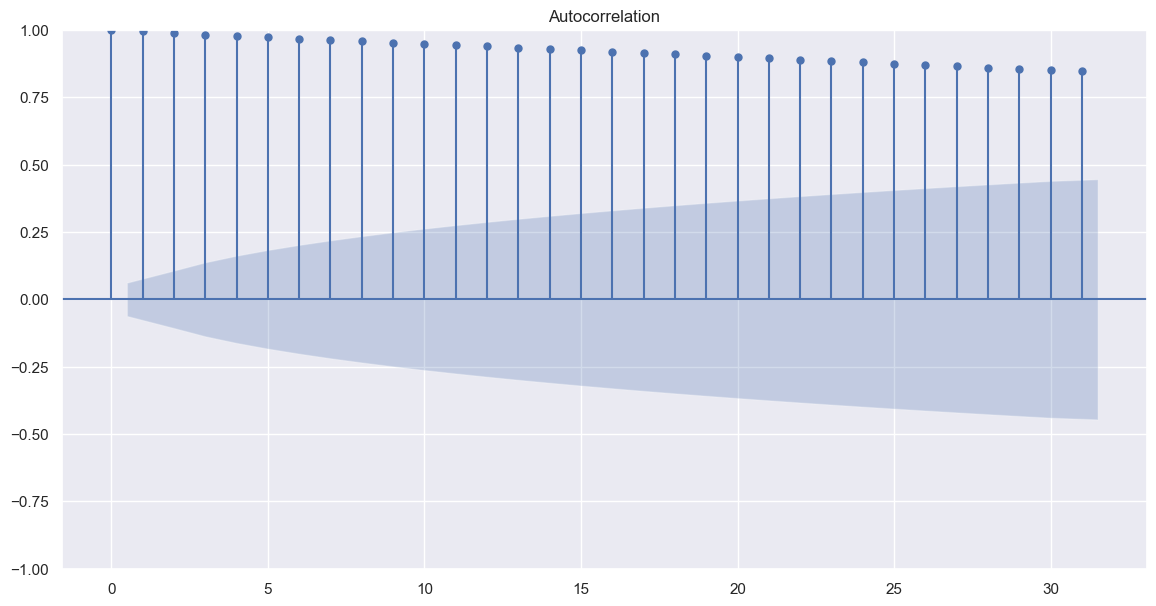

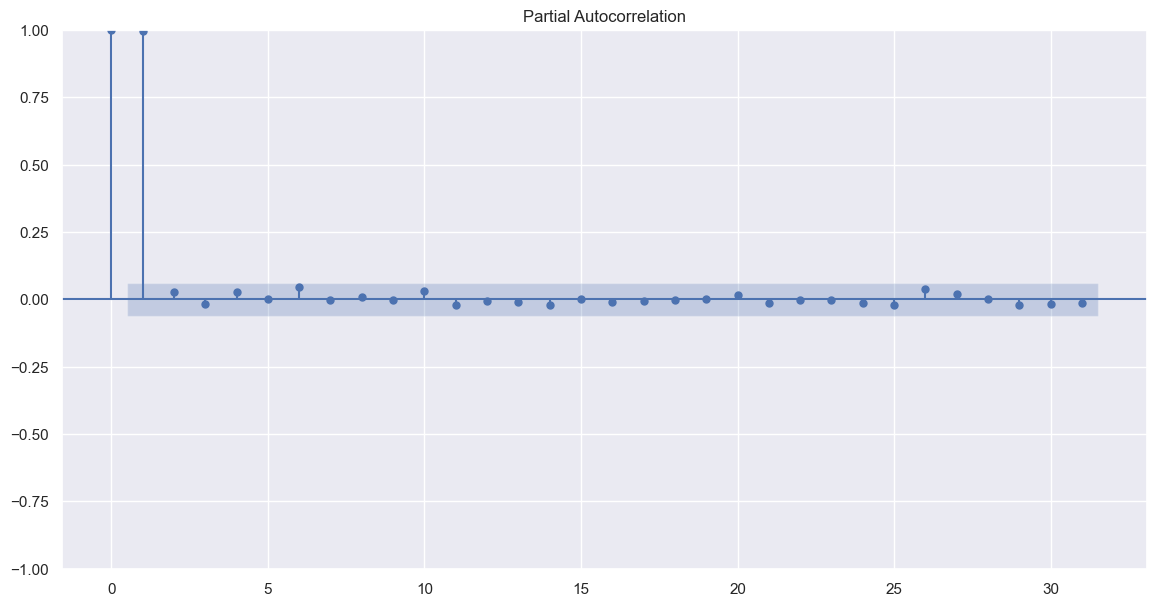

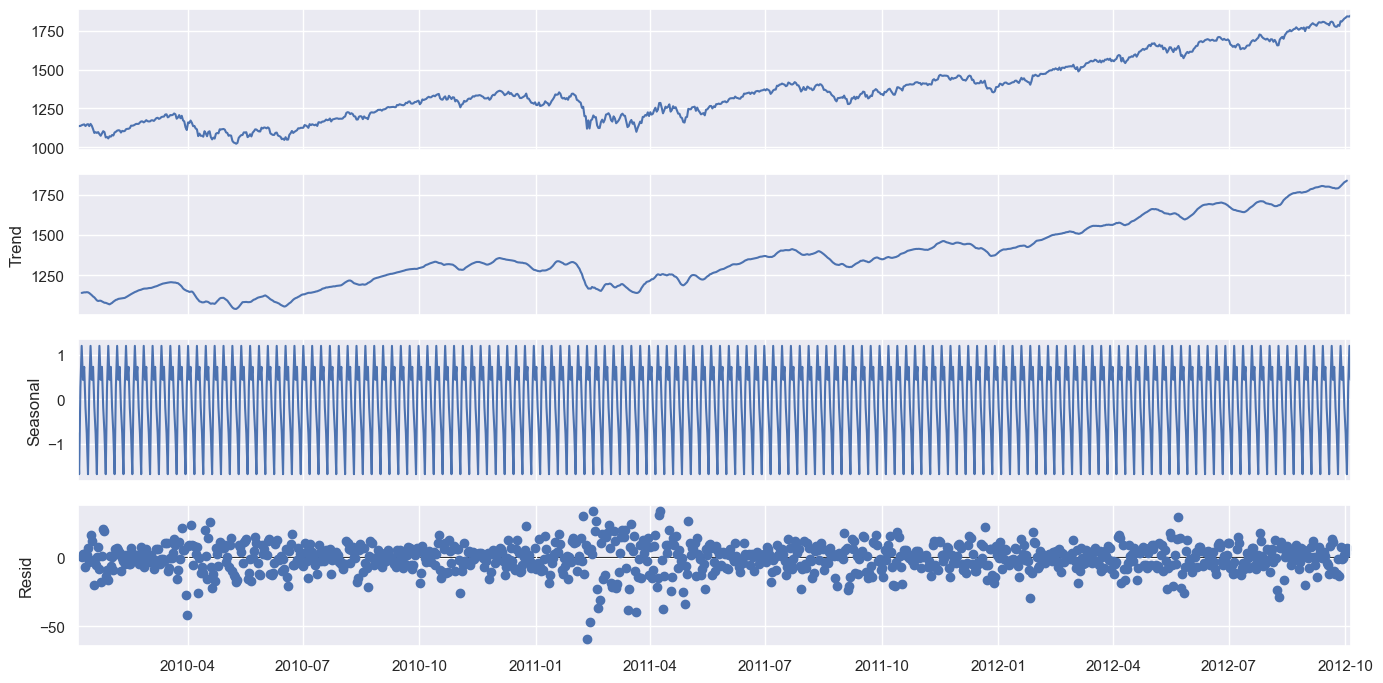

0.502474321545715
0.9849481076057242


In [49]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

In [50]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

ForecastError: Before calling a model, please make sure you have generated future dates by calling generate_future_dates(), set_last_future_date(), or ingest_Xvars_df(use_future_dates=True).

In [51]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [52]:
adf_test(special_data['Close'])

1. ADF :  0.502474321545715
2. P-Value :  0.9849481076057242
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1000
5. Critical Values :
	 1% :  -3.4369061654329998
	 5% :  -2.86443457404
	 10% :  -2.568311209


In [53]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4034.244
Date:                Sun, 17 Dec 2023   AIC                           8076.488
Time:                        17:54:01   BIC                           8096.139
Sample:                    01-04-2010   HQIC                          8083.955
                         - 10-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3104      0.775      1.690      0.091      -0.209       2.830
ar.L1         -0.8430      0.067    -12.634      0.000      -0.974      -0.712
ma.L1          0.7824      0.078     10.045      0.000       0.630       0.935
sigma2       179.5651      5.663     31.709      0.000     168.466     190.664
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               283.48
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.40
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
data_len = len(special_data)

In [55]:
train_len = data_len * 0.9
test_len = data_len - train_len

In [56]:
train_data = special_data.iloc[:int(train_len)]

In [57]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [58]:
test_data.Close

new_date
2012-06-27 07:00:00    1697.48
2012-06-28 07:00:00    1691.42
2012-06-29 07:00:00    1689.47
2012-06-30 07:00:00    1694.16
2012-07-01 07:00:00    1685.39
                        ...   
2012-10-01 07:00:00    1833.32
2012-10-02 07:00:00    1842.02
2012-10-03 07:00:00    1841.40
2012-10-04 07:00:00    1841.07
2012-10-05 07:00:00    1848.36
Name: Close, Length: 101, dtype: float64

In [59]:
train_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1.262563e+09
2010-01-05 07:00:00,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1.262650e+09
2010-01-06 07:00:00,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1.262736e+09
2010-01-07 07:00:00,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1.262822e+09
2010-01-08 07:00:00,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1.262909e+09
...,...,...,...,...,...,...,...
2012-06-22 07:00:00,1706.87,1689.42,1707.85,1689.42,1.25%,08/01/2013,1.340323e+09
2012-06-23 07:00:00,1709.67,1706.10,1709.67,1700.68,0.16%,08/02/2013,1.340410e+09
2012-06-24 07:00:00,1707.14,1708.01,1709.24,1703.55,-0.15%,08/05/2013,1.340496e+09


In [60]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=7306.521, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=7304.662, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=7305.468, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=7302.502, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=7304.486, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=7294.613, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=7304.362, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=7298.092, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=7299.961, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=7300.391, Time=0.27 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=7302.274, Time=0.35 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=7296.525, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=7304.794, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=7299.975, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=7299.237, Time=0.29 sec
 ARIMA(2,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  905
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3632.349
Date:                Sun, 17 Dec 2023   AIC                           7288.698
Time:                        17:54:16   BIC                           7346.380
Sample:                    01-04-2010   HQIC                          7310.728
                         - 06-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5915      0.432      1.368      0.171      -0.256       1.439
ar.L1          0.2157      0.112      1.919      0.055      -0.005       0.436
ar.L2          0.0468      0.115      0.407      0.684      -0.179       0.272
ar.L3          0.4576      0.072      6.319      0.000       0.316       0.600
ar.L4         -0.0093      0.105     -0.089      0.929      -0.214       0.196
ar.L5         -0.6899      0.098     -7.009      0.000      -0.883      -0.497
ma.L1         -0.2812      0.127     -2.218      0.027      -0.530      -0.033
ma.L2         -0.0037      0.124     -0.030      0.976      -0.246       0.238
ma.L3         -0.5559      0.076     -7.309      0.000      -0.705      -0.407
ma.L4          0.0871      0.121      0.717      0.473      -0.151       0.325
ma.L5          0.5964      0.112      5.303      0.000       0.376       0.817
sigma2       181.8932      6.301     28.865      0.000     169.543     194.244
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               284.83
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.52
Prob(H) (two-sided):                  0.29   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

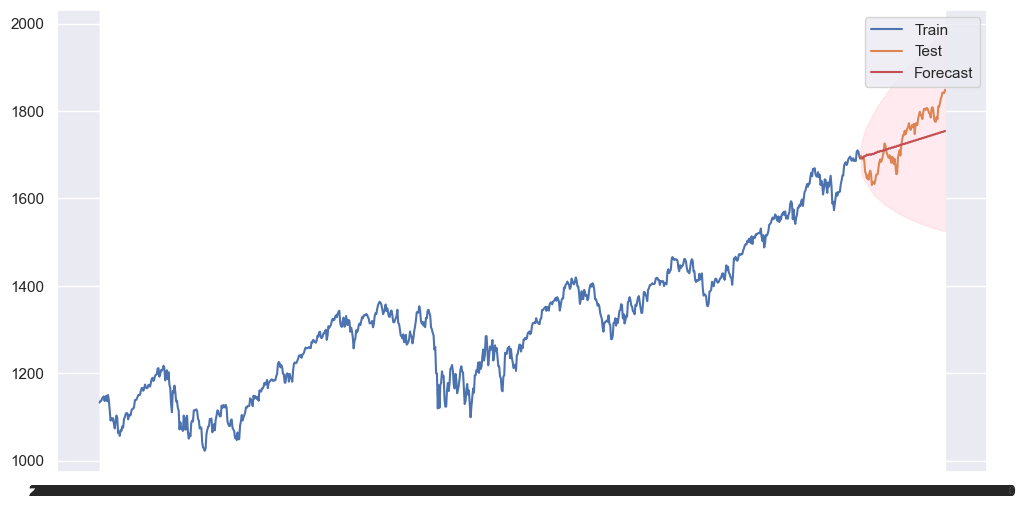

In [61]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [62]:
def calculate_metrics(array1, array2):
    # Проверка на совпадение длин массивов
    if len(array1) != len(array2):
        raise ValueError("Длины массивов должны совпадать")

    # Вычисление отклонений
    deviations = np.abs(np.array(array1) - np.array(array2))

    # Минимальное и максимальное отклонение
    min_deviation = np.min(deviations)
    max_deviation = np.max(deviations)

    # Процентное минимальное и максимальное отклонение
    min_deviation_percentage = min_deviation / np.max(np.abs(array1)) * 100
    max_deviation_percentage = max_deviation / np.max(np.abs(array1)) * 100

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(deviations / np.abs(array1)) * 100

    return min_deviation, max_deviation, min_deviation_percentage, max_deviation_percentage, mape


In [63]:
min_dev, max_dev, min_dev_percentage, max_dev_percentage, mape = calculate_metrics(test_data.Close, forecast)

print(f"Минимальное отклонение: {min_dev}")
print(f"Максимальное отклонение: {max_dev}")
print(f"Процентное минимальное отклонение: {min_dev_percentage:.2f}%")
print(f"Процентное максимальное отклонение: {max_dev_percentage:.2f}%")
print(f"MAPE: {mape:.2f}%")

Минимальное отклонение: 0.3657386510994911
Максимальное отклонение: 94.30488747672484
Процентное минимальное отклонение: 0.02%
Процентное максимальное отклонение: 5.10%
MAPE: 2.29%


In [64]:
len(special_data)

1006

In [65]:
len(train_data)

905

In [66]:
len(test_data)

101